<a href="https://colab.research.google.com/github/esh04/Clickbait-Identification/blob/main/Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---


# **CLICKBAIT ANALYSIS ON HINDI DATASETS**

---




In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Loading the given dataset and storing the sentences to be analysed in a variable

In [ ]:
path = "trainData.csv"
df = pd.read_csv(path)
df.drop('id', inplace=True, axis=1)
df

sentence  label
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0
...                                                  ...    ...
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1

[41800 rows x 2 columns]

In [ ]:
#Stores sentences to be analysed
sentence_list = df['sentence'].to_list()


## Preprocessing the dataset by-


1.   Replacing the ASCII values of several punctuations and sentence endings appropriately
2.   Removing unnecessary punctuations which does not benefit the analysis





In [ ]:
new_sentence_list = []
for sent in sentence_list:
  sent = sent.replace('\n','')
  sent = sent.replace('&#39',"'")
  sent = sent.replace('&#39;',"'")
  sent = sent.replace('quot;','"')
  sent = sent.replace('&','')
  sent = sent.replace('#','')
  sent = sent.replace('$','')
  sent = sent.replace('%','')
  sent = sent.replace('-','')
  sent = sent.replace('...','')
  new_sentence_list.append(sent)


## Creating functions to remove unnecessary-


1.   English and other foreign characters
2.   Numbers which aren't relevant with the data



In [ ]:
#FUNCTION TO REMOVE NUMERALS
import re 
def remove_num(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

def remove_caps(list):
    pattern = '[a-zA-Z]+'
    list = [re.sub(pattern, '', i) for i in list]
    return list
  
#new_sentence_list = remove_num(new_sentence_list)
#new_sentence_list = remove_caps(new_sentence_list)





---


# **ANALYSIS**


---



## Analysis And Plot based on Number Of Word Tokens

In [ ]:
#sentence tokens for judging
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
no_of_tokens = []
list_of_tokens = []
for i in new_sentence_list:
  token_list = []
  for t in word_tokenize(i): 
    token_list.append(t)
  no_of_tokens.append(len(token_list))

  #maintain a list containing list of all tokens in a sentence
  list_of_tokens.append(token_list)

#add new column for analysis
df = df.assign(num_tokens = no_of_tokens)
df

sentence  label  num_tokens
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8
...                                                  ...    ...         ...
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9

[41800 rows x 3 columns]

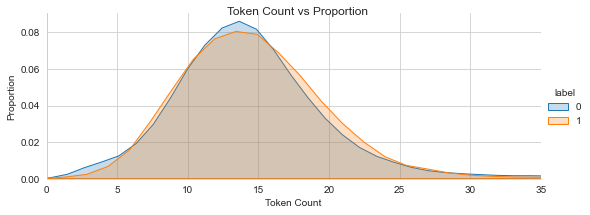

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_tokens',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 35))
plotOne.add_legend()
plotOne.set_axis_labels('Token Count', 'Proportion')
plotOne.fig.suptitle('Token Count vs Proportion')
plt.show()

## Analysis And Plot based on the presence of a Question Mark (?)

In [ ]:
#This checks for presence of ?
is_it_que = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("?"):  
      count = count + 1;  
  is_it_que.append(count)
df = df.assign(is_que = is_it_que)
df

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
41795       0  
41796       0  
41797       0  
41798       0  
41799       0  

[41800 rows x 4 columns]

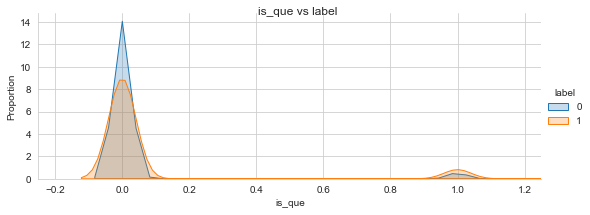

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_que',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_que', 'Proportion')
plotOne.fig.suptitle('is_que vs label')
plt.show()

## Analysis And Plot based on the presence of a Exclamation Mark (!)

In [ ]:
#This checks for presence of !
is_it_exclam = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("!"):  
      count = count + 1;  
  is_it_exclam.append(count)
df = df.assign(is_exclam = is_it_exclam)
df

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  is_exclam  
0           0          1  
1           0          0  
2           0          0  
3           0          0  
4           0          0  
...       ...        ...  
41795       0          0  
41796       0          0  
41797       0          0  
41798       0          0  
41799       0          0  

[41800 rows x 5 columns]

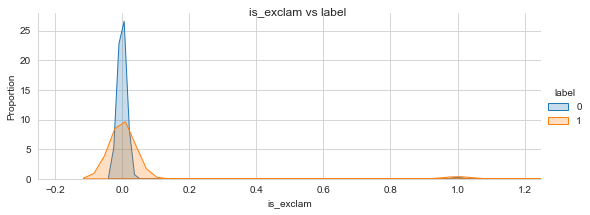

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_exclam',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_exclam', 'Proportion')
plotOne.fig.suptitle('is_exclam vs label')
plt.show()

## Analysis And Plot based on the presence of a Quotation Marks 

In [ ]:
#This checks for presence of quotes
is_it_quote = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("'", '"'):  
      count = 1;  
  is_it_quote.append(count)
df = df.assign(is_quote = is_it_quote)
df

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  is_exclam  is_quote  
0           0          1         0  
1           0          0         0  
2           0          0         0  
3           0          0         0  
4           0          0         0  
...       ...        ...       ...  
41795       0          0         1  
41796       0          0         0  
41797       0          0         0  
41798       0          0         0  
41799       0          0         0  

[41800 rows x 6 columns]

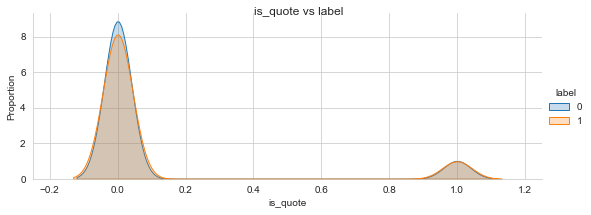

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_quote',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_quote', 'Proportion')
plotOne.fig.suptitle('is_quote vs label')
plt.show()

## Analysis and Plot based on Number Of Stop Words in each sentence

In [ ]:
#Number of stopwords in the headline
def count_stopwords(sentence_list,df):
    filename = 'stopwords.txt'
    file = open(filename, 'rt')
    stop_words = file.read()
    file.close()
    count_stopwords = []
    for sentence in sentence_list:
        count = 0;
        for word in sentence:
            if word in stop_words:  
              count += 1;  
        count_stopwords.append(count)
    df = df.assign(num_stopwords = count_stopwords)
    return df

df = count_stopwords(list_of_tokens,df)
df
        

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  is_exclam  is_quote  num_stopwords  
0           0          1         0             19  
1           0          0         0              5  
2           0          0         0             13  
3           0          0         0              5  
4           0          0         0              2  
...       ...        ...       ...            ...  
41795       0          0         1              4  
41796       0          0         0              7  
41797       0          0         0              4  
41798       0          0         0              2  
41799       0          0         0              4  

[41800 rows x 7 columns]

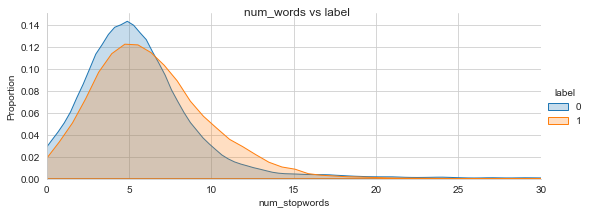

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_stopwords',shade=True)
plotOne.set(xlim=(0, 30))
plotOne.add_legend()
plotOne.set_axis_labels('num_stopwords', 'Proportion')
plotOne.fig.suptitle('num_words vs label')
plt.show()

## Analysis and Plot based on Presence of Numerals in the dataset

In [ ]:
#This checks if sentence has number in it or not
has_digit = []
for i in sentence_list:
  count = 0
  for char in i:
    if char.isdigit():
      count = count + 1
  has_digit.append(count)
num_dig = []
for i in has_digit:
  if i >= 2:
    num_dig.append(1)
  else:
    num_dig.append(0)

df = df.assign(has_num = num_dig)
df

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  is_exclam  is_quote  num_stopwords  has_num  
0           0          1         0             19        1  
1           0          0         0              5        0  
2           0          0         0             13        0  
3           0          0         0              5        0  
4           0          0         0              2        1  
...       ...        ...       ...            ...      ...  
41795       0          0         1              4        1  
41796       0          0         0              7        0  
41797       0          0         0              4        0  
41798       0          0         0              2        0  
41799       0          0         0              4        0  

[41800 rows x 8 columns]

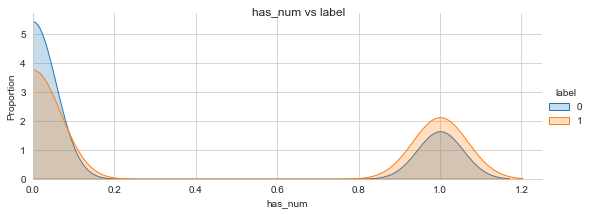

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'has_num',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('has_num', 'Proportion')
plotOne.fig.suptitle('has_num vs label')
plt.show()

## Analysis and Plot based on the Entities present (NER/NEE)

Downloading the required libraries

In [ ]:
# https://polyglot.readthedocs.io/en/stable/NamedEntityRecognition.html
!pip install polyglot
!pip install PyICU
!pip install pycld2
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 26))
!pip install morfessor

from polyglot.downloader import downloader
!polyglot download embeddings2.hi
!polyglot download ner2.hi

from polyglot.text import Text


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  1. Italian                    2. Hindi                      3. French                   
  4. Spanish; Castilian         5. Vietnamese                 6. Arabic                   
  7. Bulgarian                  8. Norwegian                  9. Estonian                 
 10. Japanese                  11. Greek, Modern             12. Slovene                  
 13. Korean                    14. Serbian                   15. Finnish                  
 16. Catalan; Valencian        17. Croatian                  18. Dutch                    
 19. Swedish                   20. Tagalog                   21. Danish                   
 22. Latvian                   23. Ukrainian                 24. Romanian, Moldavian, ... 
 25. Persian                   26. Slo

In [ ]:
def sentence_NER(sentence_list , df):

    count_PER = []
    count_ORG = []
    count_LOC = []
    PER = []
    ORG = []
    LOC = []
    
    for blob in sentence_list:
        
        text = Text(blob, hint_language_code='hi')
        for entity in text.entities:
            temp_PER = []
            temp_LOC = []
            temp_ORG = []
            if entity.tag == "I-PER":
                temp_PER.extend(entity)
            elif entity.tag == "I-LOC":
                temp_LOC.extend(entity)
            elif entity.tag == "I-ORG":
                temp_ORG.extend(entity)
                
        count_PER.append(len(temp_PER))
        count_ORG.append(len(temp_ORG))
        count_LOC.append(len(temp_LOC))
        PER.append(temp_PER)
        ORG.append(temp_ORG)
        LOC.append(temp_LOC)
            
        
 
    df = df.assign(PER_count = count_PER)
    df = df.assign(ORG_count = count_ORG)
    df = df.assign(LOC_count = count_LOC)
    df = df.assign(PER_entities = PER)
    df = df.assign(ORG_entities = ORG)
    df = df.assign(LOC_entities = LOC)
    
    return df

df = sentence_NER(new_sentence_list,df)
   

## Generating the required columns based on the Entities present

In [ ]:
sum_column = df["ORG_count"] + df["PER_count"] + df["LOC_count"]
df["total_NER"] = sum_column

df

sentence  label  num_tokens  \
0      यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...      0          34   
1      जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...      1          14   
2      रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...      0          21   
3      बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...      0          15   
4            चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n      0           8   
...                                                  ...    ...         ...   
41795  ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...      1          14   
41796  जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...      1          14   
41797  मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...      0          12   
41798                      सबसे बड़ी आसानी के साथ। । ।\n      0           7   
41799        द वीक के सबसे फेब और द्राब सेलिब्रिटी लुक\n      1           9   

       is_que  is_exclam  is_quote  num_stopwords  has_num  PER_count  \
0           0          1         0             19        1          0   
1           0          0         0              5        0          2   
2           0          0         0             13        0          2   
3           0          0         0              5        0          0   
4           0          0         0              2        1          0   
...       ...        ...       ...            ...      ...        ...   
41795       0          0         1              4        1          0   
41796       0          0         0              7        0          0   
41797       0          0         0              4        0          2   
41798       0          0         0              2        0          2   
41799       0          0         0              4        0          0   

       ORG_count  LOC_count     PER_entities ORG_entities LOC_entities  \
0              0          1               []           []        [चीन]   
1              0          0   [जस्टिन, बीबर]           []           []   
2              0          0   [रॉल्फ, हैरिस]           []           []   
3              1          0               []    [शिवसेना]           []   
4              1          0               []    [शिवसेना]           []   
...          ...        ...              ...          ...          ...   
41795          1          0               []    [ईएसपीएन]           []   
41796          1          0               []    [ईएसपीएन]           []   
41797          0          0  [रूपा, गांगुली]           []           []   
41798          0          0  [रूपा, गांगुली]           []           []   
41799          1          0               []        [वीक]           []   

       total_NER  
0              1  
1              2  
2              2  
3              1  
4              1  
...          ...  
41795          1  
41796          1  
41797          2  
41798          2  
41799          1  

[41800 rows x 15 columns]

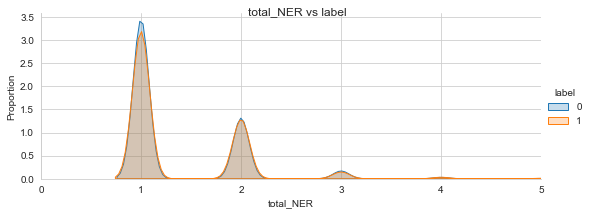

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'total_NER',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('total_NER', 'Proportion')
plotOne.fig.suptitle('total_NER vs label')
plt.show()

## Plotting the required graphs for Analysis Based On Entities

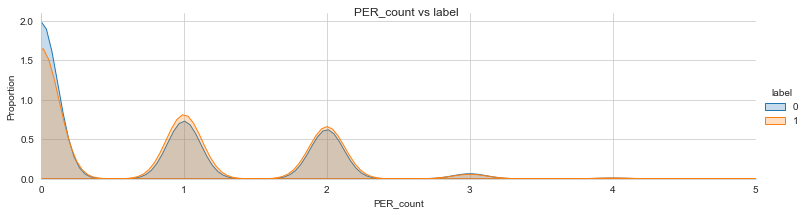

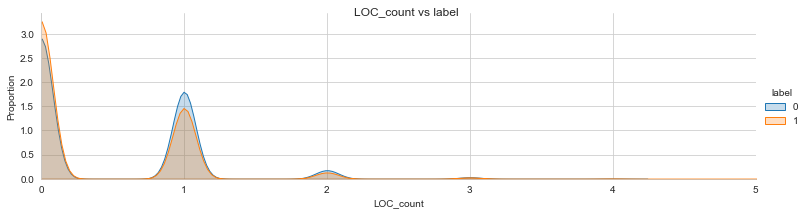

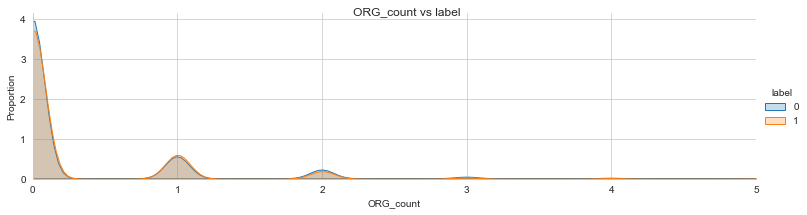

In [ ]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'PER_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('PER_count', 'Proportion')
plotOne.fig.suptitle('PER_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'LOC_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('LOC_count', 'Proportion')
plotOne.fig.suptitle('LOC_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'ORG_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('ORG_count', 'Proportion')
plotOne.fig.suptitle('ORG_count vs label')
plt.show()



In [ ]:
label_0 = df[df["label"] == 0]
label_1 = df[df["label"] == 1]



---


# **WordCloud Generation**


---



In [ ]:
from wordcloud import WordCloud
from wordcloud.wordcloud import FONT_PATH
from collections import Counter

def Word_cloud(entity_list):
    entity = []
    for item in entity_list:
        if len(item):
            listToStr = ' '.join(map(str, item))
            entity.append(listToStr)
    
    entity_string = ' '.join([str(elem) for elem in entity])
    list_entity = list(entity_string.split(" "))
    dictionary=Counter(list_entity)


    words_in_cloud = dictionary.most_common(50)
    print(words_in_cloud)
    # print all words in decreasing order of priority

    #top 100 words make the word cloud
    font="./font/gargi.ttf"
    cloud = WordCloud(max_font_size=80,colormap="hsv",width=600, height=400,background_color="white",font_path=font,max_words=155).generate_from_frequencies(dictionary)
    plt.figure(figsize=(20,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return list_entity
            

## Drawing contrasts between the Entities according to whether they are Clickbait or NOT.

### Non-Clickbait, Personal NER

[('ट्रम्प', 1415), ('डोनाल्ड', 469), ('ओबामा', 218), ('जॉन', 142), ('पुतिन', 104), ('थेरेसा', 91), ('बुश', 90), ('क्लिंटन', 89), ('डेविड', 84), ('पॉल', 82), ('सिंह', 77), ('माइकल', 76), ('जॉर्ज', 73), ('कोहली', 69), ('जेम्स', 61), ('विलियम्स', 60), ('हिलेरी', 56), ('कैरी', 53), ('बराक', 47), ('किम', 47), ('जैक्सन', 46), ('पीटर', 46), ('बीजेपी', 45), ('मार्टिन', 44), ('फिशर', 43), ('रयान', 43), ('एमएस', 43), ('मोदी', 43), ('क्रिस', 41), ('अखिलेश', 40), ('माइक', 40), ('युवराज', 39), ('पीएम', 39), ('टिम', 38), ('रिचर्ड', 38), ('हैरी', 38), ('टेलर', 38), ('स्टीव', 38), ('रोजर', 37), ('किंग', 36), ('धोनी', 35), ('टॉम', 35), ('यादव', 34), ('व्हाइट', 34), ('जस्टिन', 34), ('बेन', 33), ('एंडी', 33), ('जेरेमी', 33), ('मिशेल', 33), ('जोन्स', 32)]


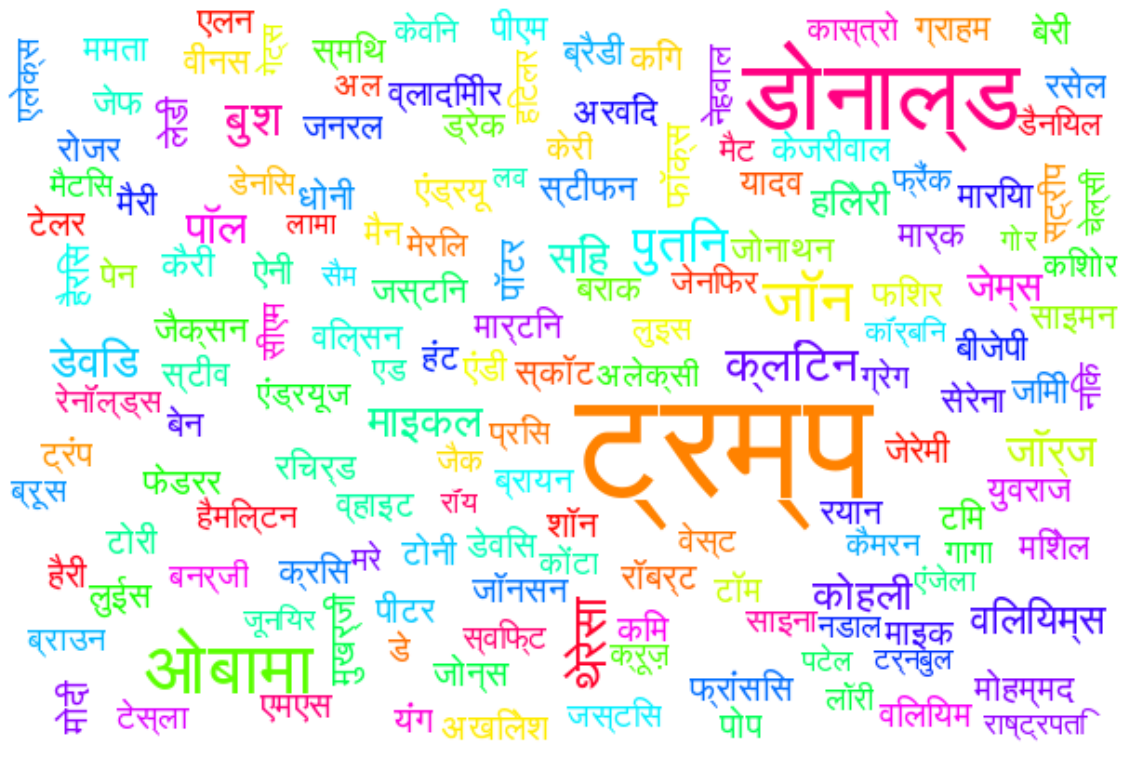

In [ ]:
PER_0 = Word_cloud(label_0["PER_entities"])


### Clickbait, Personal NER

[('ट्रम्प', 1460), ('डोनाल्ड', 402), ('ओबामा', 302), ('हैरी', 133), ('पॉटर', 111), ('हिलेरी', 99), ('क्लिंटन', 96), ('जॉन', 77), ('जॉर्ज', 75), ('माइकल', 65), ('जेम्स', 64), ('कैरी', 63), ('किम', 60), ('डेविड', 58), ('जस्टिन', 57), ('पॉल', 54), ('रयान', 51), ('पुतिन', 51), ('टेलर', 50), ('फिशर', 49), ('थेरेसा', 41), ('बुश', 41), ('स्विफ्ट', 41), ('क्रिस', 38), ('माइक', 38), ('मिशेल', 38), ('किशोर', 37), ('टिम', 37), ('व्हाइट', 37), ('कार्दशियन', 37), ('टॉम', 36), ('जोन्स', 34), ('विलियम्स', 34), ('बराक', 33), ('स्टीव', 33), ('केरी', 32), ('किंग', 31), ('मैन', 31), ('जस्ट', 30), ('मोदी', 29), ('स्कॉट', 29), ('मार्टिन', 28), ('जेनिफर', 28), ('स्पीयर्स', 27), ('ब्रैडी', 26), ('फॉक्स', 26), ('पीएम', 26), ('ब्रिटनी', 26), ('कोहली', 26), ('बेन', 25)]


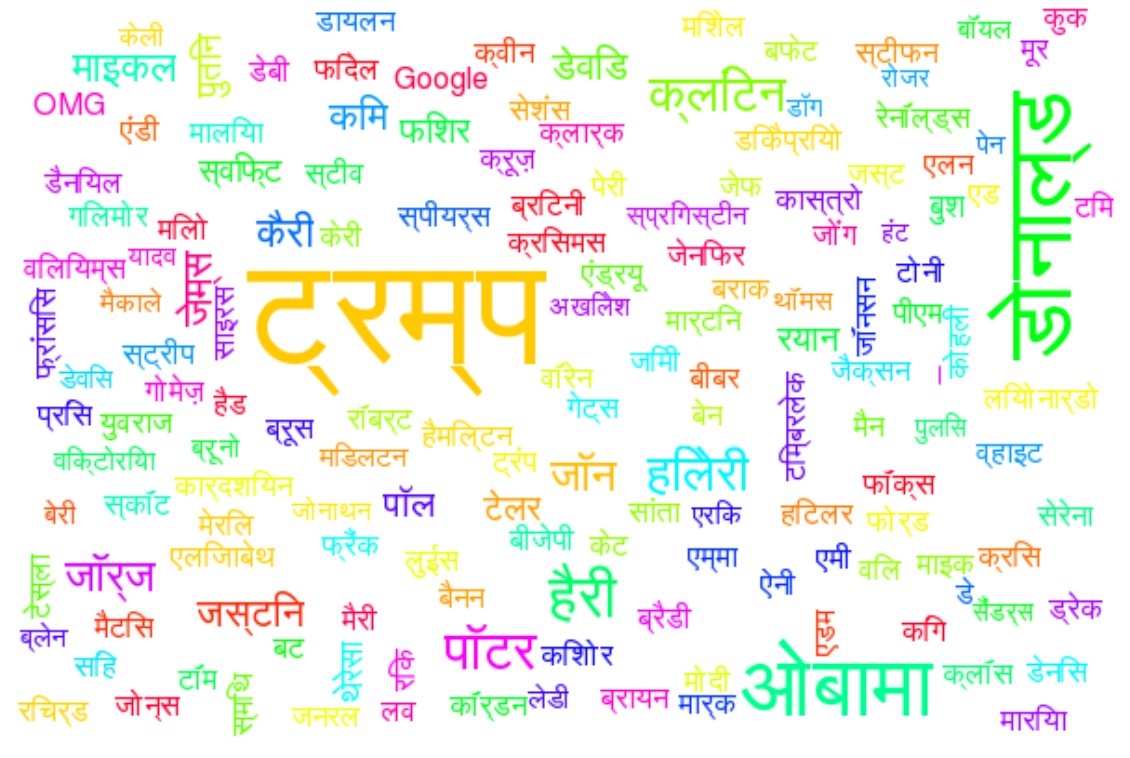

In [ ]:
PER_1 = Word_cloud(label_1["PER_entities"])


### Non-Clickbait, Location NER

[('अमेरिका', 523), ('चीन', 436), ('ब्रिटेन', 218), ('दक्षिण', 183), ('कोरिया', 183), ('दिल्ली', 176), ('मुंबई', 171), ('रूस', 171), ('भारत', 165), ('रूसी', 149), ('इंग्लैंड', 136), ('लंदन', 126), ('तुर्की', 126), ('कोलकाता', 124), ('यूरोप', 118), ('जापान', 115), ('सीरिया', 112), ('ऑस्ट्रेलिया', 107), ('पाकिस्तान', 106), ('महाराष्ट्र', 100), ('उत्तर', 97), ('यूके', 95), ('इजरायल', 91), ('कनाडा', 84), ('पश्चिम', 79), ('न्यूजीलैंड', 75), ('न्यू', 72), ('मेक्सिको', 72), ('पेरिस', 72), ('फ्रांस', 72), ('ब्रिटिश', 71), ('वाशिंगटन', 67), ('इराक', 67), ('बैंकॉक', 62), ('न्यूयॉर्क', 62), ('ब्राजील', 61), ('ईरान', 61), ('कैलिफोर्निया', 57), ('इटली', 52), ('जर्मनी', 51), ('सऊदी', 51), ('अफगानिस्तान', 51), ('मैनचेस्टर', 50), ('यमन', 50), ('बीसीसीआई', 48), ('म्यांमार', 47), ('ताइवान', 45), ('वेनेजुएला', 43), ('ऑस्ट्रेलियाई', 42), ('टेक्सास', 41)]


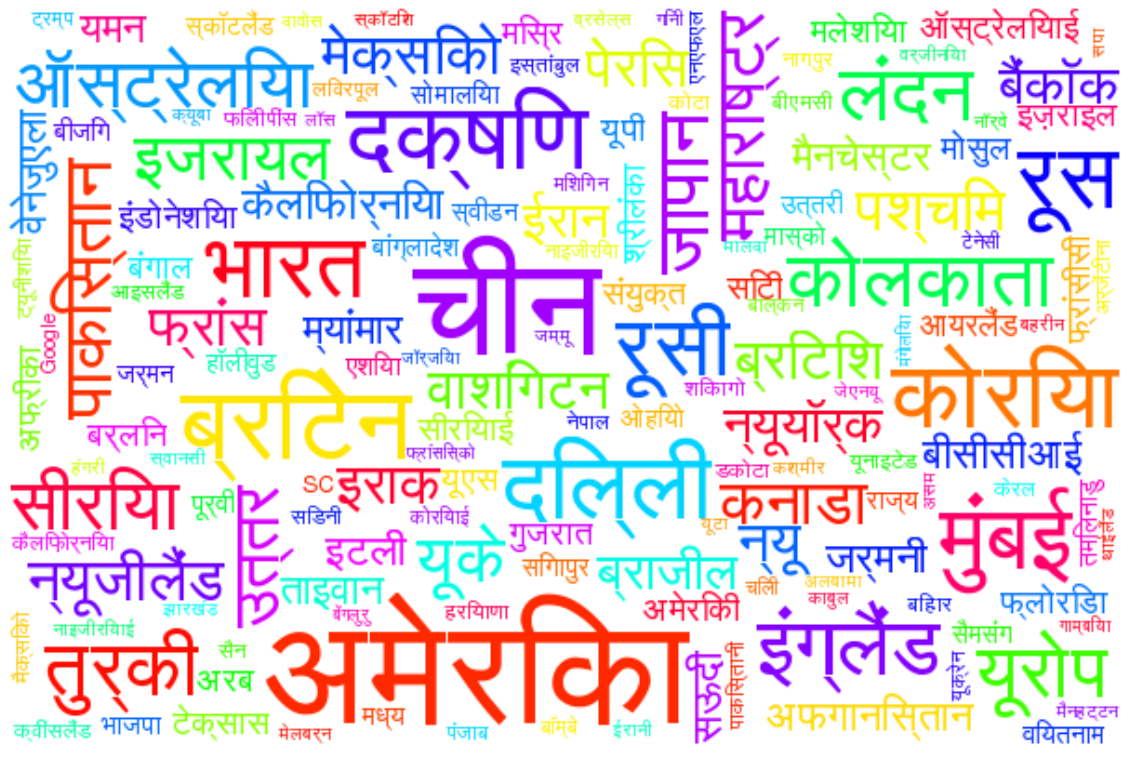

In [ ]:
LOC_0 = Word_cloud(label_0["LOC_entities"])

### Clickbait, Location NER

[('अमेरिका', 426), ('चीन', 191), ('रूस', 146), ('रूसी', 107), ('ब्रिटेन', 100), ('लंदन', 92), ('दक्षिण', 91), ('कोरिया', 87), ('ऑस्ट्रेलिया', 86), ('भारत', 84), ('यूरोप', 74), ('सीरिया', 72), ('मेक्सिको', 71), ('कनाडा', 68), ('कैलिफोर्निया', 68), ('इंग्लैंड', 63), ('जापान', 63), ('उत्तर', 61), ('न्यूयॉर्क', 59), ('पेरिस', 59), ('मुंबई', 57), ('दिल्ली', 57), ('वाशिंगटन', 57), ('तुर्की', 54), ('न्यू', 51), ('फ्रांस', 48), ('पाकिस्तान', 47), ('ईरान', 45), ('इजरायल', 43), ('ब्रिटिश', 43), ('यूके', 42), ('बर्लिन', 39), ('कोलकाता', 37), ('महाराष्ट्र', 36), ('ब्राजील', 35), ('इटली', 34), ('जर्मनी', 34), ('टेक्सास', 32), ('शिकागो', 32), ('संयुक्त', 31), ('न्यूजीलैंड', 31), ('अफगानिस्तान', 29), ('फ्लोरिडा', 29), ('ताइवान', 29), ('यूएस', 27), ('अफ्रीका', 27), ('कैलिफ़ोर्निया', 26), ('एशिया', 26), ('स्वीडन', 26), ('अमेज़न', 26)]


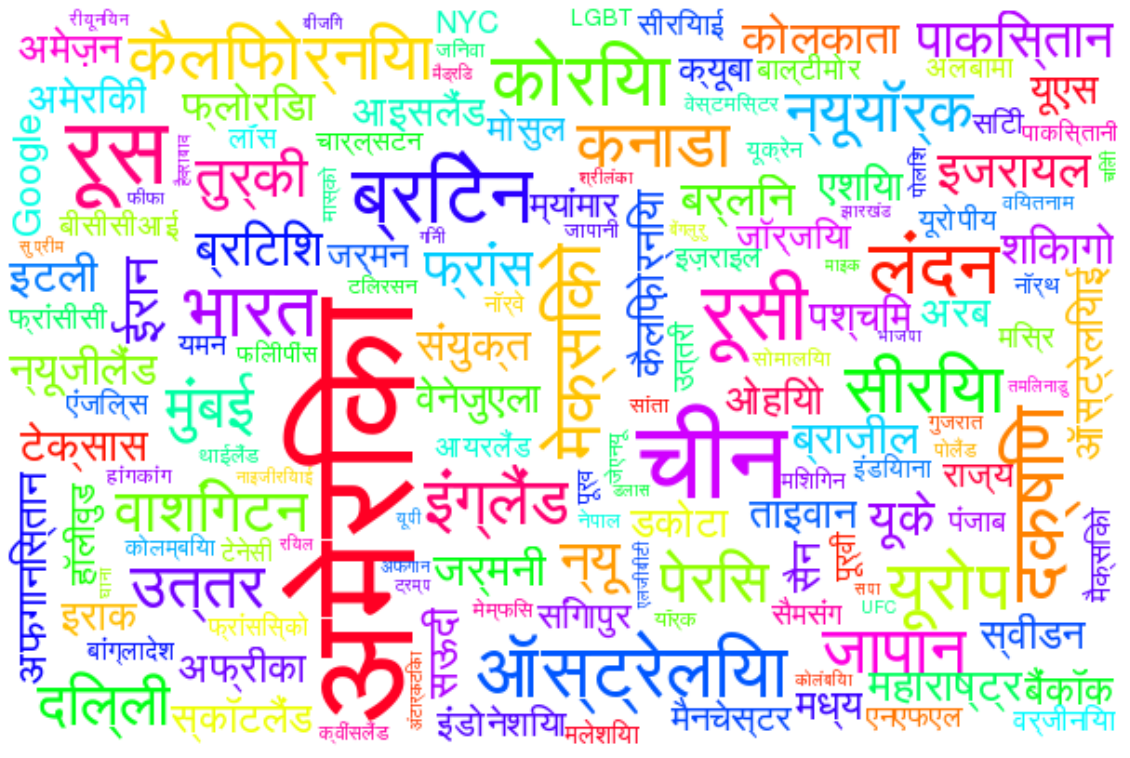

In [ ]:
LOC_1 = Word_cloud(label_1["LOC_entities"])

### Non-Clickbait, Organisation NER

[('ट्रम्प', 188), ('पुलिस', 126), ('यूरोपीय', 118), ('व्हाइट', 114), ('संघ', 113), ('ट्विटर', 108), ('कांग्रेस', 78), ('बीबीसी', 78), ('लीग', 64), ('हाउस', 60), ('सिटी', 57), ('दिल्ली', 56), ('क्रिकेट', 50), ('संयुक्त', 49), ('फुटबॉल', 46), ('ओपन', 45), ('याहू', 43), ('राष्ट्र', 41), ('चाइना', 40), ('शिवसेना', 36), ('वॉल', 35), ('ओलंपिक', 34), ('आयोग', 32), ('यूएस', 31), ('भारतीय', 30), ('इनसाइडर', 29), ('थाई', 29), ('एयर', 28), ('सरकार', 28), ('पार्टी', 28), ('एयरलाइंस', 28), ('वेस्ट', 28), ('स्ट्रीट', 28), ('इंडिया', 27), ('नेशनल', 27), ('टाइम्स', 26), ('भाजपा', 26), ('शिकागो', 25), ('प्रीमियर', 24), ('एनबीए', 23), ('तालिबान', 22), ('नाटो', 22), ('डोनाल्ड', 22), ('मैकडॉनल्ड्स', 22), ('मुंबई', 22), ('ऑस्ट्रेलियाई', 21), ('विश्वविद्यालय', 21), ('बैंक', 21), ('सैमसंग', 21), ('कप', 20)]


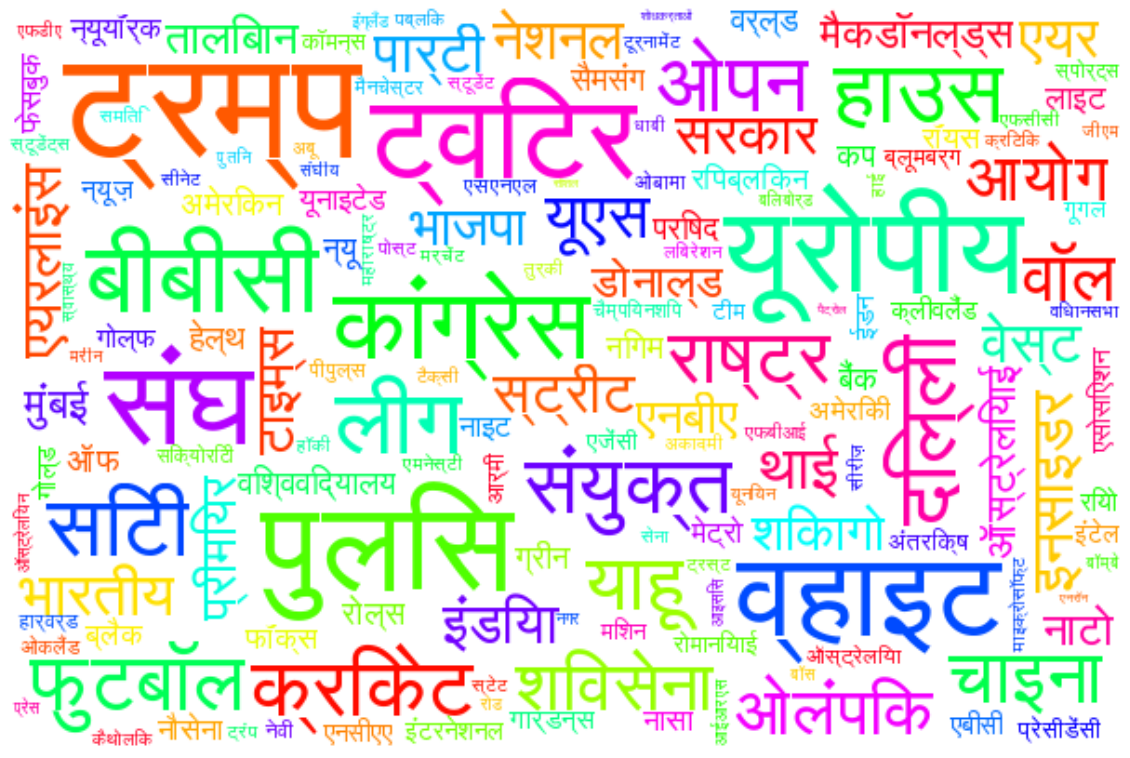

In [ ]:
ORG_0 = Word_cloud(label_0["ORG_entities"])

### Clickbait, Organisation NER

[('ट्रम्प', 177), ('ट्विटर', 151), ('व्हाइट', 129), ('पुलिस', 73), ('हाउस', 57), ('टाइम्स', 56), ('फुटबॉल', 56), ('मैकडॉनल्ड्स', 51), ('संघ', 47), ('एयरलाइंस', 45), ('यूरोपीय', 44), ('याहू', 43), ('कांग्रेस', 41), ('बीबीसी', 38), ('नासा', 34), ('लीग', 33), ('संयुक्त', 33), ('पार्टी', 33), ('क्रिकेट', 33), ('राष्ट्र', 31), ('फेसबुक', 29), ('इंडिया', 28), ('वेस्ट', 28), ('नाटो', 26), ('शिकागो', 25), ('न्यूयॉर्क', 24), ('परिषद', 24), ('इनसाइडर', 24), ('ऑफ', 23), ('सिटी', 22), ('डोनाल्ड', 22), ('एनबीए', 22), ('प्रेसीडेंसी', 21), ('दिल्ली', 21), ('बेस्ट', 21), ('वॉल', 21), ('यूनाइटेड', 21), ('सैमसंग', 20), ('सीएनएन', 19), ('भारतीय', 19), ('ब्लैक', 18), ('पिक्चर्स', 18), ('नेटफ्लिक्स', 17), ('विश्वविद्यालय', 17), ('स्टूडेंट', 17), ('फोर्ब्स', 17), ('नेशनल', 16), ('Apple', 16), ('स्ट्रीट', 16), ('बास्केटबॉल', 16)]


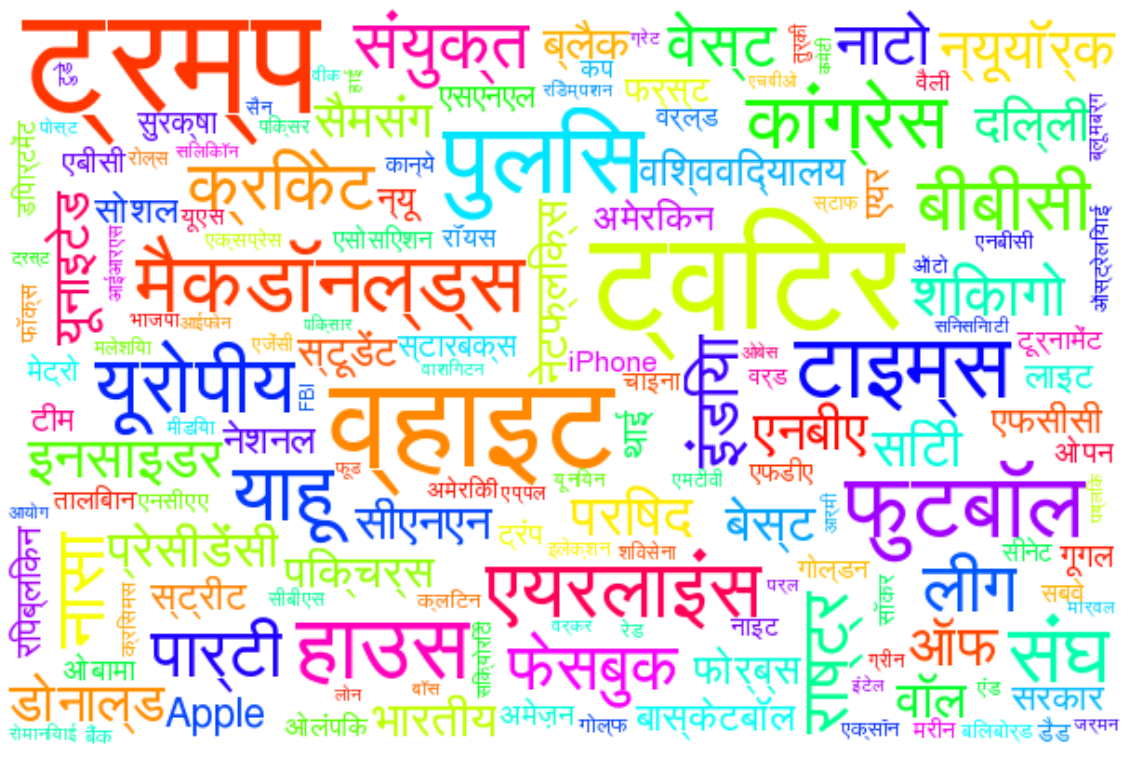

In [ ]:
ORG_1 = Word_cloud(label_1["ORG_entities"])

In [ ]:
PER_1_only = list(set(PER_1) - set(PER_0))
PER_0_only = list(set(PER_0) - set(PER_1))

ORG_1_only = list(set(ORG_1) - set(ORG_0))
ORG_0_only = list(set(ORG_0) - set(ORG_1))

LOC_1_only = list(set(LOC_1) - set(LOC_0))
LOC_0_only = list(set(LOC_0) - set(LOC_1))


#**Further Analysis**
## List of entities unique to Clickbait

### *Personal NER*

In [ ]:
print(PER_1_only)

['कोरी', 'ign', 'लाइवली', 'जिहादी', 'स्टेलोन', 'ड्रायमंड', 'ईए', 'वेनर', 'बोरुसिया', 'रिक्टर', 'ब्रेट', 'स्टॉकहोम', 'अमाश', 'रिलेशनशिप', 'मटिल्डा', 'DEADMAU5', 'फैराडे', 'रे', 'मोस्टट्विटेड', 'गर्ल्स', 'एडवोकेट', 'लोन', 'कुड्रो', 'बर्डमैन', 'एक्जिस्टेड', 'डिक्स', 'हावर्ड', 'वेदरमैन', 'आईएसआईएस', 'अलास्कास', 'वायोला', 'आर्मीग्रीन', 'सैंडलर', 'Pewdiepie', 'क्लेपर', 'माल्कॉम', 'जैकुबोव्स्की', 'गेमर', 'किकर', 'फर्स्टग्रेडर्स', 'अब्बास', 'जमाल', 'आइकिया', 'अनीता', 'होली', 'रूडोल्फ', 'टारनटिनो', 'डायनर', 'मेमोरियल', 'क्लेग', 'दाऊद', 'एंगस', 'हिगिंस', 'एसईसी', 'बेस्टपेइंग', 'फ्लोरिडा', 'एरियाना', 'विद्रोही', 'बे', 'अफलातून', 'गेराइट्स', 'टाइरेड', 'Beyonc', 'ट्रिक्स', 'नाइस्मिथ', 'आइज़', 'हला', 'पांचवेंग्रेडर', 'शानिया', 'मिस्सी', 'सैफ', 'पीबीएस', 'DMV', 'स्टीफेंस', 'ब्रोमांस', 'सेकोर्स', 'स्नेप', 'बियॉन्से', 'बर्कशायर', 'एडवेंचर्स', 'स्टेपल्स', 'रिडले', 'बूस्टेड', '3वर्षीय', 'न्यूज़वीक', 'टुसीस', 'कॉनन', 'एगुइलेरा', 'लेटो', 'ट्रीट्स', 'विला', 'बोनर्जी', 'एमिलिया', 'गेटिंग', 'हिप्स्टर्स', 'लैम

### *Location NER*

In [ ]:
print(LOC_1_only)

['जीत', 'एम्बीड', 'कॉर्पोरेट', 'ट्रंप', 'सिनसिनाटी', 'वेयरहाउस', 'Unnerve', 'प्राचीन', 'मुग़ल', 'तटीय', 'ग्रॉग्स', 'पीटर्सबर्ग', 'नेब्रास्का', 'लेह', 'ISRO', 'पूर्वचक्रवात', 'लंड', 'Airliner', 'ताहिती', 'RNC', 'लैपलैंड', 'टायरॉल', 'लीजेंड', 'सेल्फी', 'नेप्च्यून', 'Saturns', 'पुर्तगाल', 'डॉक्सिंग', 'रशियन', 'MLB', 'मर्क', 'क्रिसमस', 'बीच', 'फाल्कन्स', 'शंघाई', 'कैशस्ट्रेप्ड', 'इटालियन', 'लाइव', 'फिली', 'पिलानी', 'फ्रांसिस', 'जॉर्ज', 'यूरोजोन', '२०१५', 'Oracle', 'जोसेफ', 'किर्गिस्तान', 'रॉकेट्स', 'कॉप्टिक', 'पार्लियामेंट', 'कोलोन', 'बेसबॉल', 'विदेश', 'सातवें', 'हेंज', 'मेन', 'तिमोर', 'अनलकीली', 'पोप', 'वोग', '२०१६', 'शहरों', 'अमेरिकन', 'कैनेडी', 'लैग्स', 'लोए', 'बास्क', 'बीवर', 'स्टेट', 'जोय', 'Maatsuyker', 'होक्स', 'जॉन', 'इंडियानापोलिस', 'ओबामास', 'नैरोबी', 'एज', 'फ़्लोरिडा', 'Android', 'ग्रेसर्ड', 'NOAA', 'Giuliani', 'क्लेम्सन', 'फिदेल', 'आर्म्स', 'न्यूफ़ाउंडलैंड', 'स्टॉप्स', 'सेंट्रल', 'कॉमी', 'द्वितीय', 'उत्तरपूर्व', 'डेवन', 'कान्सास', 'फेड्स', 'डीएनसी', 'ऑर्गनाइज़र', 'हाइकु', 'राजध

### *Organisation NER*

In [ ]:
print(ORG_1_only)

['हैम्पशायर', 'Tencent', 'साइन', 'आयोटे', 'बान', 'चेरी', 'लॉरी', 'दुबई', 'पिक्सार', 'एक्सेल', 'टॉप', 'कीस्टोन', 'वेडिंग', 'फाइटर', 'फार्मा', 'होलीवुड', 'पिज़्ज़ा', 'एंटोनियो', 'केप', 'जॉर्डन', 'लोम्बार्डी', 'ईए', 'पोर्ट्रेट', 'कंसल्टिंग', 'मिलर', 'अमेजन', 'होमलैंड', 'ऑलपुरुष', 'फोटो', 'Drexel', 'बेंज', 'क्राउन', 'यूट्यूब', 'ओक्लाहोमा', 'स्पेनिश', 'समिट', 'एडिलेड', 'वीए', 'एजेंट', 'बर्कले', 'एबे', 'ज्योग्राफिक', 'AMD', 'फोर्ड', 'डेनिस', 'लिबरल', 'माइक', 'कम्युनिटी', 'लाइज', 'पांडा', 'UFC', 'स्नो', 'अर्लिंग्टन', 'टोयोटा', 'एक्सपी', 'ह्यूमन', 'मोंटाना', 'आरएनसी', 'जर्मन', 'इंटरनेट', 'रॉडी', 'वार्षिक', 'लिंकिन', 'आईटीवी', 'ब्लैंड', 'सोंग', 'पोस्टिंग', 'विद', 'पेनी', 'NHL', 'रिजर्व', 'बाथ', 'वोग', 'डेली', 'प्रोटेस्ट', 'यूसी', 'टॉस्क', 'जेसी', 'डोवर', 'मेवेदर', 'सोफी', 'सर्कस', 'मोदी', 'सेलेब्रिटी', 'वॉल्ट', 'कोलंबियन', 'बॉडीगार्ड', 'लिमिटेड', 'ओल्ड', 'मॉन्स्टर', 'गॉट', 'मिनेसोटा', 'प्रधानमंत्री', 'ऑस्कर', 'वेव', 'ESPN', 'केली', 'इलस्ट्रेटेड', 'प्यूज़ो', 'साल्वेशन', 'पुनर्जागरण', 'एंडरसन', '

## List of entities unique to Non-Clickbait

### *Personal NER*

In [ ]:
print(PER_0_only)

['गांगुली', 'Goldcrest', 'कैडिलैक', 'यूएस', 'धन्यवाद', 'बोजन', 'स्वराज', 'ग्लूसेस्टर', 'लीजेंड्स', 'ब्वॉयफ्रेंड', 'वैपनर', 'ज़ेड', 'पई', 'ब्राउनेल', 'रटल्स', 'ज्योफ', 'ग्रीनस्लेड', 'इवांस', 'युवक', 'क्राउडफंडिंग', 'दिमित्री', 'कैसे', 'शिकागो', 'कीन्स', 'क्लेमेंट्स', 'प्रिचर्ड', 'वेडरन', 'केलिन', 'हैनकॉकवॉइस', 'फिजराल्ड', 'रुथ', 'पैट्रिस', 'काफ्का', 'बिस्नोनेट', 'मर्कले', 'फ्रायड', 'व्याट', 'बेकर', 'हैज', 'नननेरी', 'व्हेडन', 'एवरीमैन', 'फाइंड', 'स्टाल', 'डियरडेन', 'राफेल', 'टाउनसेंड', 'मेन्स', 'रोमनी', 'सईद', 'केंट', 'शाल्मली', 'सांचेज', 'काज़ी', 'मार्टिंस', 'ओनइबोर', 'मिनाज', 'एफसीओ', 'लुम्बा', 'सानू', 'राइनो', 'ज़ेनोफ़ॉन', 'कार्लो', 'मेंबर्स', 'ज़ीरो', 'मिलिए', 'LGBTIQ', 'डिक्सन', 'मैकडरमोट', 'मार्कोटे', 'XVIII', 'गैटर', 'हेनरीटा', 'नवालनी', 'गुथरी', 'फ़िरताश', 'फेल्ड', 'चैनस्मोकर्स', 'चैबोन', 'कोनराड', 'वावरिंका', 'ले', 'मोक्स', 'अरस्कॉट', 'कुलदीप', 'कोपोला', 'वॉग', 'हार्विन', 'पियरेपॉल', 'CRUCIBLE', 'रोज', 'लुथेरन', 'विराट', 'SUNY', 'पोलो', 'लक', 'बस्ट', 'बेलुची', 'गोर्बाचेव', 'केव'

### *Location NER*

In [ ]:
print(LOC_0_only)

['ब्रिटन', 'पर्टो', 'सूथबी', 'टियांजिन', 'आइलैंड', 'उपनिवेश', 'दिमित्री', 'एनसीपी', 'ड्यूश', 'सात', 'व्याट', 'इमैनुएल', 'भुवनेश्वर', 'लिबरल', 'रिज़ॉर्ट', 'लखनऊ', 'यीशु', 'नेवार्क', 'पैन', 'रिट्रीट', 'फिलिपींस', 'गवर्नर्स', 'हिसार', 'एफसी', 'औरंगाबाद', 'तन्ना', 'कुक', 'रीवा', 'जामनगर', 'फेरारी', 'ग्लेन', 'सीवर्ल्ड', 'ओरिजिनल', 'इस्कॉन', 'माल्टा', 'अमीर', 'लांस', 'तमिल', 'कोस्टा', 'वाल्सा', 'औपनिवेशिक', 'स्लिम', 'हॉलैंड', 'लोवा', 'एमडी', 'इल', 'शॉर्टेज', 'फ्लोरेंस', 'पेन', 'पीबीएस', 'बालाघाट', 'बेरूत', 'कुई', 'ओस्लो', 'मॉरीशस', 'उज्बेकिस्तान', 'बास', 'बंगलौर', 'बर्मिंघम', 'सिसिली', 'गार्डन', 'मॉर्निंग', 'मालाबार', 'मुर्दाघर', 'एबीबीएएस', 'मध्यपूर्व', 'बेवर्ली', 'ट्रायल', 'अहमदाबाद', 'सीबीएसई', 'ओडिशा', 'गवर्नमेंट', 'काहिरा', 'नासिक', 'एकदिवसीय', 'ओरेकल', 'पकिस्तान', 'हाउ', 'तब्बू', 'एसीसी', 'ज़्यूरिख', 'प्रेसीडेंसी', '।', 'ट्विटर', 'फाइनेंशियल', 'इराकी', 'टकाटा', 'नरेगा', 'इराक़ी', 'टाइटन', 'जीई', 'जैक', 'इस्लाम', 'नेस्ले', 'CIA', 'व्हाइट', 'डेड', 'यूगोस्लाविया', 'युद्धपोत', 'कार्लोस', '

### *Organisation NER*

In [ ]:
print(ORG_0_only)

['प्रतिनिधिमंडल', 'कैरेबियन', 'मिडनाइट', 'डीईए', 'पीटर्सबर्ग', 'डियाज', 'आइलैंड', 'जोन्स', 'रेल', 'इजराइल', 'बीपीओ', 'क्रॉस', 'बांग्लादेश', 'जेट्स', 'डूम', 'IRS', 'हिजबुल्ला', 'एलजी', 'ITV', 'आरएएफ', 'ओल्डटाइमर', 'यहूदियों', 'हॉक्स', 'यूनिटी', 'स्टेंसन', 'डे', 'एलीट', 'MICROSOFT', 'न्यूयार्क', 'ब्राजील', 'न्याय', 'गोर्बाचेव', 'मेडिकेयर', 'डोमिनोज़', 'जेनर', 'पोपोविच', 'इतिहास', 'क्वींस', 'नीति', 'सनडांस', 'ल्योनबेसिकटास', 'ऑयल', 'स्काई', 'Live', 'ट्रेड', 'एक्ट्स', '17.1', 'हिज', 'कासिच', 'जापान', 'iPad', 'कमांडो', 'टेक्नोलॉजी', 'ब्यूरो', 'सीरिया', 'ठाणे', 'समाजवादी', 'कतर', 'बर्नी', 'मॉर्निंग', 'रेलवे', 'ऑनर', 'प्रूडेंशियल', 'ओहियो', 'कैडबरी', 'पापुआ', 'ब्राउन', 'पूसा', 'मिल्स', 'कार्यकर्ता', 'कोस्ट', 'म्यूज़ियम', 'रॉकफेलर', 'फ़र्म', 'गार्सिया', 'चार्जर्स', 'एरेना', 'आईएमएफ', 'केयर', 'एफिल', 'नॉर्विच', 'टू', 'शतरंज', 'ग्रीनपीस', 'पेट्रोल', 'दूरसंचार', 'आईपीसीसी', 'परमानंद', 'फीनिक्स', 'सीज', 'इंडस्ट्रियल', '।', 'पैनल', 'देयर', 'जीई', 'आईवी', 'आईसीसी', 'संरक्षण', 'हावड़ा', 'डिनर', 'ज़ू'

# **Analysis and Plots Based on POS Tags**

In [ ]:
!pip install stanza
import stanza
stanza.download('hi')

In [ ]:
nlp=stanza.Pipeline(lang='hi',processors='tokenize,pos,lemma')
ct=0
label=df['label'].to_list()
noun=[[0]*50,[0]*50]
verb=[[0]*50,[0]*50]
adj=[[0]*50,[0]*50]
n_lst=[]
v_lst=[]
a_lst=[]
nva=[0,0,0]
for sentence in sentence_list:
  s_label=label[ct]
  out=nlp(sentence)
  lst=[word.pos for sent in out.sentences for word in sent.words]
  for i in lst:
    if i=='NOUN' or i=='PROPN':
      nva[0]+=1
    elif i=='VERB':
      nva[1]+=1
    elif i=='ADJ' or i=='NUM':
      nva[2]+=1
    else:
      continue
  n_lst.append(nva[0])
  v_lst.append(nva[1])
  a_lst.append(nva[2])


  if nva[0]>=50 or nva[1]>=50 or nva[2]>=50:
    ct+=1
    continue
  
  noun[s_label][nva[0]]+=1
  verb[s_label][nva[1]]+=1
  adj[s_label][nva[2]]+=1
  nva=[0,0,0]
  ct+=1

df = df.assign(num_noun = n_lst)
df = df.assign(num_verb = v_lst)
df = df.assign(num_adj = a_lst)


In [ ]:
plt.bar(np.arange(26),noun[0][:26],color='g',label='Non-Clickbait',width=0.25)
plt.bar(np.arange(26)+0.25,noun[1][:26],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of nouns in a line")
plt.ylabel("Number of lines")
plt.title("Nouns")
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.bar(np.arange(10),verb[0][:10],color='g',label='Non-Clickbait',width=0.25)
#plt.plot(verb[1][:30],color='r',label='cl')
plt.bar(np.arange(10)+0.25,verb[1][:10],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of verbs in a line")
plt.ylabel("Number of lines")
plt.title("Verbs")
plt.legend()
#plt.savefig(fname='verb.png')
plt.show()
plt.close()

In [ ]:
plt.bar(np.arange(12),adj[0][:12],color='g',label='Non-Clickbait',width=0.25)
#plt.plot(adj[1][:30],color='r',label='cl')
plt.bar(np.arange(12)+ 0.25,adj[1][:12],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of adjectives in a line")
plt.ylabel("Number of lines")
plt.title("Adjectives")
plt.legend()
#plt.savefig(fname='adj.png')
plt.show()
plt.close()

## Now, we:
1. Combining all the CSV files generated during analysis
2. Converting the total dataframe into CSV file for prediction purposes

In [ ]:
df1 = df
df1.drop('LOC_entities', inplace=True, axis=1)
df1.drop('ORG_entities', inplace=True, axis=1)
df1.drop('PER_entities', inplace=True, axis=1)
df1.to_csv('pre_f.csv', index=False)

path = "pos_data.csv"
df2 = pd.read_csv(path)
df2.drop('id', inplace=True, axis=1)

result = pd.concat([df1, df2], axis=1, join='inner')
result.to_csv('final_parameters.csv', index=False)
#Final CSV file with all the final parameters generated